In [ ]:
!pip install mediapipe opencv-python matplotlib

In [4]:
from google.colab import files

# Uploader un fichier
uploaded = files.upload()


Saving img_1005.jpg to img_1005.jpg


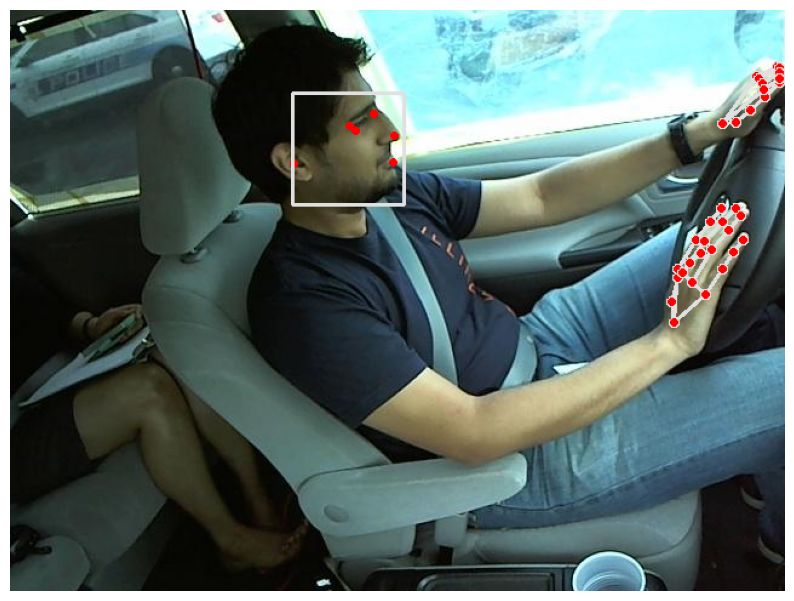

In [5]:
import cv2
from matplotlib import pyplot as plt
import mediapipe as mp

# Initialisation de MediaPipe
mp_hands = mp.solutions.hands
mp_face = mp.solutions.face_detection
mp_drawing = mp.solutions.drawing_utils

# Ton image uploadée (remplace si tu as un autre nom)
image_path = "img_1005.jpg"

# Charger l'image
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Détection visage
face_detection = mp_face.FaceDetection(min_detection_confidence=0.5)
results_face = face_detection.process(image_rgb)

# Détection mains
hands = mp_hands.Hands(static_image_mode=True, max_num_hands=2, min_detection_confidence=0.5)
results_hands = hands.process(image_rgb)

# Dessiner les résultats
output = image.copy()

# Visages
if results_face.detections:
    for detection in results_face.detections:
        mp_drawing.draw_detection(output, detection)

# Mains
if results_hands.multi_hand_landmarks:
    for hand_landmarks in results_hands.multi_hand_landmarks:
        mp_drawing.draw_landmarks(output, hand_landmarks, mp_hands.HAND_CONNECTIONS)

# Afficher l’image
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

# Fermer les modèles
hands.close()
face_detection.close()
